In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')  # If the CSV file contains special or non-UTF characters (like emojis, special symbols), UTF-8 decoding might fail.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3942,ham,I got a call from a landline number. . . I am ...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
2093,spam,Final Chance! Claim ur å£150 worth of discount...,NaN,NaN,NaN
3830,ham,Let's pool our money together and buy a bunch ...,NaN,NaN,NaN
4216,ham,Will be office around 4 pm. Now i am going hos...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
# First we will do Data Cleaning

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns

In [8]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [9]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) we can also do this


In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#rename the columns:
df.rename(columns={'v1':'type','v2':'msg'},inplace=True)
df.sample(5)

,type,msg
5086,ham,Omg if its not one thing its another. My cat h...
4589,ham,Tomorrow i am not going to theatre. . . So i c...
2425,ham,Hey!!! I almost forgot ... Happy B-day babe ! ...
891,ham,I am great princess! What are you thinking abo...
4599,ham,Hi did u decide wot 2 get 4 his bday if not il...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['type']=encoder.fit_transform(df['type'])

In [14]:
df.head()

,type,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check if any missing value:
df.isnull().sum()

type    0
msg     0
dtype: int64

In [16]:
#check for duplicate val:
df.duplicated().sum()

np.int64(403)

In [17]:
#as there are 403 duplicate msg so we need to remove them:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

In [20]:
#Till Now we have done Data Cleaning like remove unwanted columns,check if null, remove duplicates .

#Now we will do EDA i.e Exploratory Data Analysis : EDA is the process of understanding your data before modeling.
# It helps uncover patterns, detect outliers, check assumptions, and spot missing data. 

In [21]:
df.head()


,type,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['type'].value_counts()

type
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2704ce2aba0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

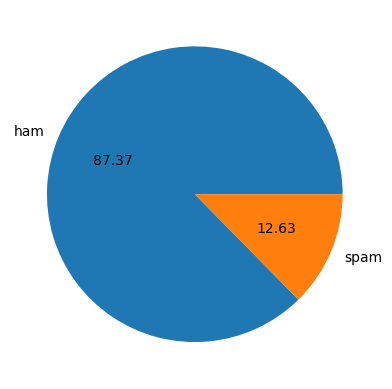

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [24]:
# on seeing %ages, we can say that DATA is Imbalanced.

In [25]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import nltk

In [27]:
!pip install nltk


Access is denied.


In [28]:
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to C:\Users\Narender
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
df['num_characters'] = df['msg'].apply(len)


In [30]:
df.head()

,type,msg,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
import nltk

# ✅ This downloads the correct 'punkt' tokenizer
nltk.download('punkt_tab')

# ✅ Test if it works now
from nltk.tokenize import sent_tokenize

text = "Hello Himanshu. You are doing well. Keep it up!"
print(sent_tokenize(text))


['Hello Himanshu.', 'You are doing well.', 'Keep it up!']


[nltk_data] Downloading package punkt_tab to C:\Users\Narender
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [32]:
# num of words
df['num_words'] = df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,type,msg,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences'] = df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [35]:
df.head()

,type,msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# for ham
df[df['type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#spam
df[df['type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

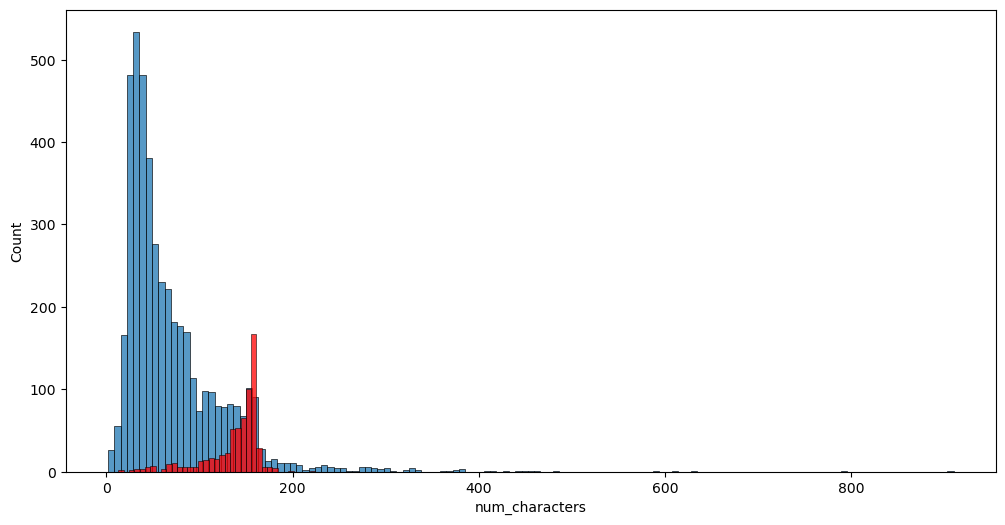

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_characters'])
sns.histplot(df[df['type'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

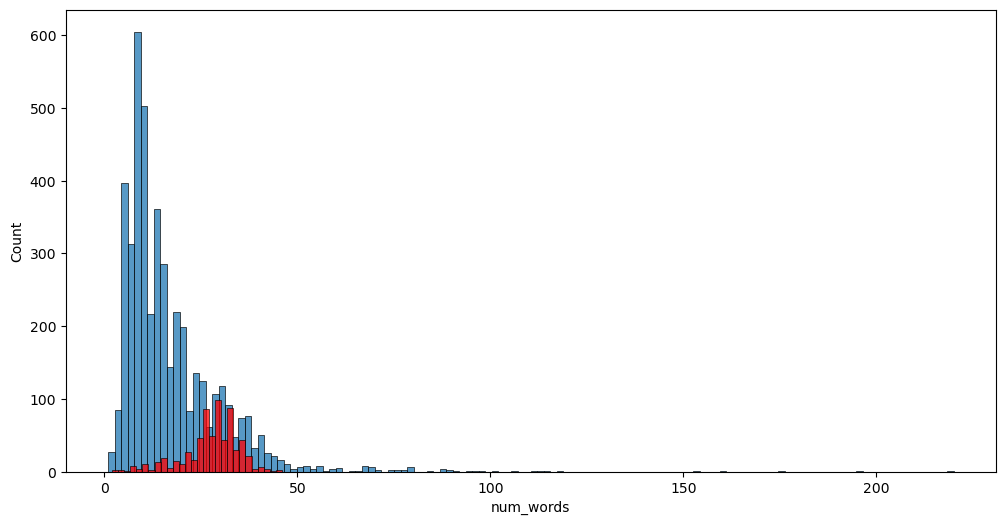

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_words'])
sns.histplot(df[df['type'] == 1]['num_words'],color='red')

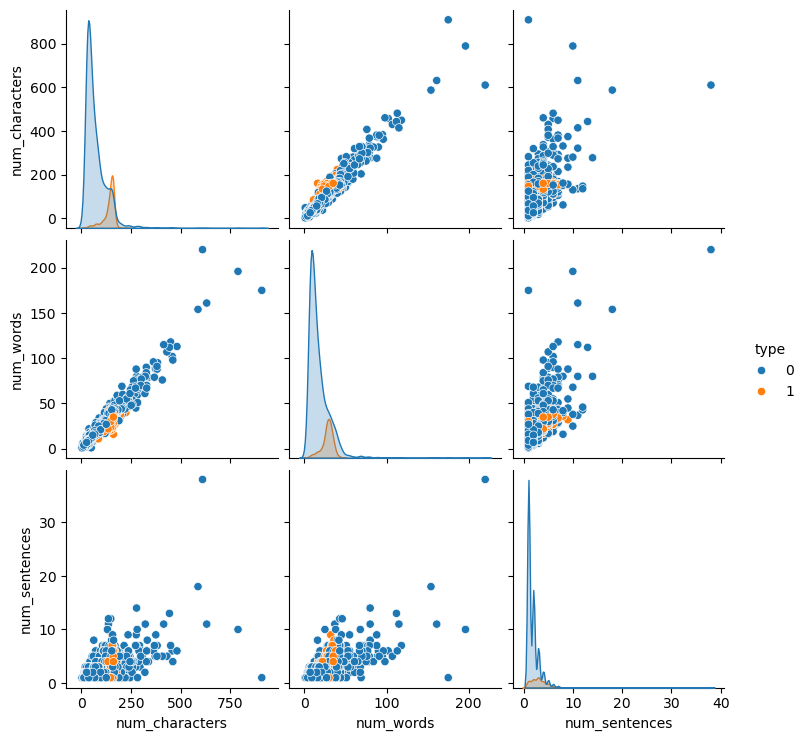

In [42]:
sns.pairplot(df,hue='type')

<Axes: >

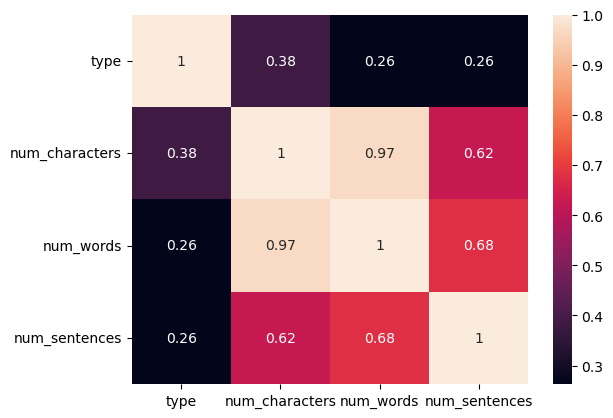

In [43]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [44]:
# EDA is Done 

In [45]:
# Now we will do Data Preprocessing:lowercase,tokenization,removing special char,removing stop words and punctuation,stemming

In [46]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Narender
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Narender
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Narender
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Narender
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_t

True

In [47]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to C:\Users\Narender
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df['msg'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [50]:
df['transformed_msg'] = df['msg'].apply(transform_text)

In [51]:
df.head()

,type,msg,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
df.tail()

,type,msg,num_characters,num_words,num_sentences,transformed_msg
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [53]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:

len(spam_corpus)

9939

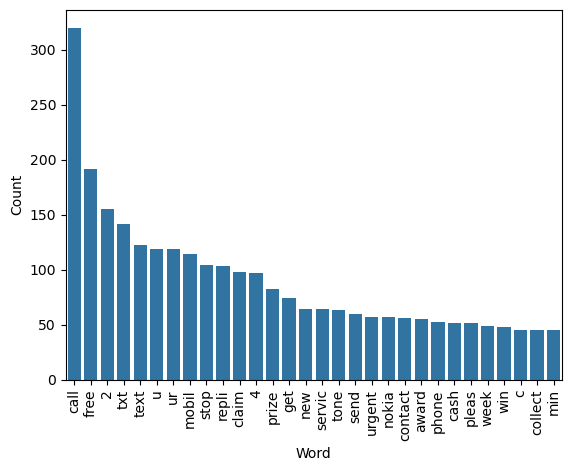

In [55]:
from collections import Counter
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
top_words.columns = ['Word', 'Count']

# Plot
sns.barplot(x='Word', y='Count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

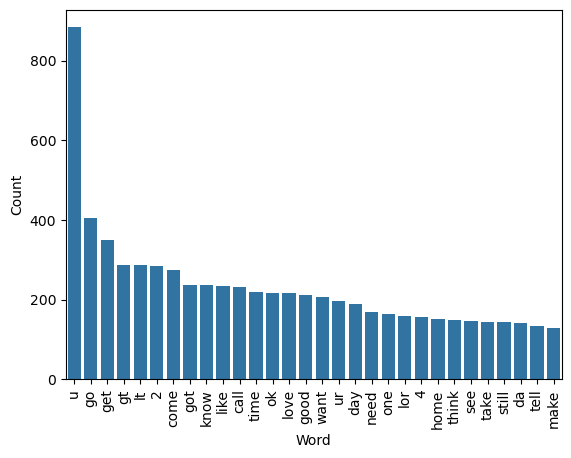

In [58]:
from collections import Counter
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
top_words.columns = ['Word', 'Count']

# Plot
sns.barplot(x='Word', y='Count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
# Now data preprocessing is done

In [60]:
#Lets move to the MODEL BUILDING:

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_msg']).toarray()


In [63]:
X.shape


(5169, 3000)

In [64]:
y=df['type'].values

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [68]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [69]:
lrc.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [70]:
y_pred = lrc.predict(X_test)


In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9564796905222437
Precision: 0.9696969696969697
Confusion Matrix:
 [[893   3]
 [ 42  96]]


In [72]:
from sklearn.svm import SVC


In [73]:
from sklearn.neighbors import KNeighborsClassifier


In [74]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()

In [75]:
svc.fit(X_train, y_train)


SVC(gamma=1.0, kernel='sigmoid')

In [76]:
y_pred = svc.predict(X_test)


In [77]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
Confusion Matrix:
 [[893   3]
 [ 22 116]]


In [78]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
y_pred=knc.predict(X_test)

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9052224371373307
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 98  40]]


In [81]:
clfs = {
    'Logistic Regression:':lrc,
    'Support Vector Classifier' : svc,
    'K-Nearest Neighbors' : knc, 
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Logistic Regression:
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  Support Vector Classifier
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  K-Nearest Neighbors
Accuracy -  0.9052224371373307
Precision -  1.0


In [84]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [85]:
performance_df

,Algorithm,Accuracy,Precision
2,K-Nearest Neighbors,0.905222,1.000000
1,Support Vector Classifier,0.975822,0.974790
0,Logistic Regression:,0.956480,0.969697


In [86]:
import pickle

# Save the TF-IDF vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Save each model
pickle.dump(lrc, open('logistic_model.pkl', 'wb'))
pickle.dump(svc, open('svm_model.pkl', 'wb'))
pickle.dump(knc, open('knn_model.pkl', 'wb'))
